In [1]:
import json 
import networkx as nx
  

from conjecture.consolidated_functions import *
from conjecture.all_valid_orderings import *
from conjecture.optimization_functions import *
from iterative_heuristic.modified_etf import Mod_ETF
from iterative_heuristic.consolidated import *
from iterative_heuristic.approximate_speeds import *
from makespan_energy.construct_graph_util import *
from makespan_energy.visualization_util import *
from trace_data.graph_list_from_trace import *
import networkx as nx
import numpy as np
import math
import plotly.express as px
import pandas as pd 

In [2]:
# Construct DAGs

file_list = ['1000genome-chameleon-2ch-100k-001.json',
'1000genome-chameleon-2ch-250k-001.json',
'1000genome-chameleon-4ch-100k-001.json',
'1000genome-chameleon-4ch-250k-001.json',
'1000genome-chameleon-6ch-100k-001.json',
'1000genome-chameleon-6ch-250k-001.json',
'1000genome-chameleon-8ch-100k-001.json',
'1000genome-chameleon-8ch-250k-001.json',
'1000genome-chameleon-10ch-100k-001.json',
'1000genome-chameleon-10ch-250k-001.json',
'1000genome-chameleon-12ch-100k-001.json',
'1000genome-chameleon-12ch-250k-001.json',
'1000genome-chameleon-14ch-100k-001.json',
'1000genome-chameleon-14ch-250k-001.json',
'1000genome-chameleon-16ch-100k-001.json',
'1000genome-chameleon-16ch-250k-001.json',
'1000genome-chameleon-18ch-100k-001.json',
'1000genome-chameleon-18ch-250k-001.json',
'1000genome-chameleon-20ch-100k-001.json',
'1000genome-chameleon-20ch-250k-001.json',
'1000genome-chameleon-22ch-100k-001.json',
'1000genome-chameleon-22ch-250k-001.json']
    
G_list = []

for file in file_list:
    
    # Opening JSON file 
    f = open('pegasus-traces-master/1000genome/chameleon-cloud/' + file) 

    # returns JSON object as  
    # a dictionary 
    data = json.load(f) 

    taskname_to_id = {}
    id_count = 0

    G = nx.DiGraph()

    for task in data['workflow']['jobs']:

        child_id = id_count
        id_count += 1
        taskname_to_id[task['name']] = child_id

        if not G.has_node(child_id):
                G.add_node(child_id)

        for parent in task['parents']:
            if parent in taskname_to_id:

                parent_id = taskname_to_id[parent]

            else:

                parent_id = id_count
                id_count += 1
                taskname_to_id[parent] = parent_id


            if not G.has_edge(parent_id, child_id):
                    G.add_edge(parent_id, child_id)
    print(len(G.nodes))

    
   
    G_list.append(G)
    
    # Closing file 
    f.close() 

52
82
104
164
156
246
208
328
260
410
312
492
364
574
416
656
468
738
520
820
572
902


In [3]:
G_list[0]

In [4]:
mrt = True
tie_breaking_rule = 2
plot = False
num = 5
x = []
y = []
lbs= []
ubs = []
 
num_machines = 50
naives = []
heur = []
for G in G_list[:num]:
    
    ratio = []
    num_tasks = len(G.nodes)
    
    w = [1 for _ in range(num_tasks)]
    s = [1 for _ in range(num_tasks)]

    naive, true, order =iterative_and_naive_heuristic_no_ratio(num_machines, w, G, verbose=False)
    _, _, obj_opt, _ = get_objective_single_ordering(True, G, w, order, plot=plot, compare=False)
    d = get_optimal_schedule(mrt, G, num_machines, w, plot, verbose=False)
    # if solver was successful
    # and d["objective_task_scaling"] != 10000000
    #if obj_opt != 10000000 and d["objective_task_scaling"] != 10000000:
        
    x.append(num_tasks)
    heur.append(true)
    naives.append(naive)
    y.append(obj_opt)
    lbs.append(d["objective_task_scaling"])
    ub = obj_ub_precise = 2 * sum(psize_to_speed(ub_lst_graph(G, order)))
    ubs.append(ub)
 

[[11, 10, 24], [23, 22, 25], [0, 26], [1, 27], [2, 28], [3, 29], [4, 30], [5, 31], [6, 32], [7, 33], [8, 34], [9, 35], [12, 36], [13, 37], [14, 38], [15, 39], [16, 40], [17, 41], [18, 42], [19, 43], [20, 44], [21, 45], [46], [47], [48], [49], [50], [51], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
[2.3636363636363638, 2.3636363636363638, 2.3636363636363638, 2.3636363636363638, 2.3636363636363638, 2.3636363636363638, 2.3636363636363638, 2.3636363636363638, 2.3636363636363638, 2.3636363636363638, 15.0, 2.3636363636363638, 2.3636363636363638, 2.3636363636363638, 2.3636363636363638, 2.3636363636363638, 2.3636363636363638, 2.3636363636363638, 2.3636363636363638, 2.3636363636363638, 2.3636363636363638, 2.3636363636363638, 15.0, 2.3636363636363638, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
-
apm 172.8.132.240_gk_model1 <br><pre> ----------------------------------------------------------------
 APMonitor, Ver

apm 172.8.132.240_gk_model3 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          134
   Constants    :            0
   Variables    :         9603
   Intermediates:            0
   Connections  :         8498
   Equations    :         5287
   Residuals    :         5287
 
 Number of state variables:           9603
 Number of total equations: -         5420
 Number of slack variables: -         1020
 ---------------------------------------
 Degrees of freedom       :           3163
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program con

apm 172.8.132.240_gk_model5 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          156
   Constants    :            0
   Variables    :        11841
   Intermediates:            0
   Connections  :        10764
   Equations    :         6381
   Residuals    :         6381
 
 Number of state variables:          11841
 Number of total equations: -         6536
 Number of slack variables: -          970
 ---------------------------------------
 Degrees of freedom       :           4335
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program con

apm 172.8.132.240_gk_model7 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          216
   Constants    :            0
   Variables    :        19101
   Intermediates:            0
   Connections  :        16944
   Equations    :        10521
   Residuals    :        10521
 
 Number of state variables:          19101
 Number of total equations: -        10736
 Number of slack variables: -         1990
 ---------------------------------------
 Degrees of freedom       :           6375
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program con

apm 172.8.132.240_gk_model9 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.0
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :          208
   Constants    :            0
   Variables    :        17709
   Intermediates:            0
   Connections  :        16120
   Equations    :         9545
   Residuals    :         9545
 
 Number of state variables:          17709
 Number of total equations: -         9752
 Number of slack variables: -         1430
 ---------------------------------------
 Degrees of freedom       :           6527
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program con

In [5]:
print("x is \n", x)
print("y is \n", y)
print("lbs are \n",lbs)
print("ubs are \n", ubs)
print("naives are \n",naives)
print("heurs are \m",heur)

x is 
 [52, 82, 104, 164, 156]
y is 
 [10000000, 211.78277, 283.00367, 10000000, 10000000]
lbs are 
 [138.76296, 201.98304, 277.52593, 403.96608, 416.28889]
ubs are 
 [250.93243070200978, 577.4734015813629, 534.0444243892096, 1365.7424306066362, 1040.8469150000017]
naives are 
 [148.30004302064893, 221.7940729711244, 293.9525235229871, 504.029336768957, 471.0826787583051]
heurs are \m [139.13807148598073, 227.3767883404069, 283.2467057204387, 508.5818790997782, 497.2412801573425]


In [6]:
print(len(y))
print(len(x))

5
5


In [7]:
# naives = [572.8281617409056, 1331.3128540244006, 2051.988186148974, 4908.957570715966, 4427.097315671543, 10722.551392522024, 7706.784325022744, 18780.723094156718, 11887.994968277473, 29080.41842969494, 16967.104097800042, 41618.012251501, 22950.791107151243, 56400.18395313568, 29836.001750405976, 73423.87928867387, 37619.11087992854, 92685.47311048009, 46306.79788927975, 114191.64481211497, 55896.00853253448, 137939.34014765336]
# heurs = [351.14748449053826, 698.6688417479015, 1181.833119651485, 2392.931559303018, 2515.1051913091133, 5128.200522698374, 4320.182955770601, 8876.07384841392, 6602.766119158128, 13562.092685406415, 9411.33279943706, 19356.644767630198, 12670.852536835615, 26103.094518568214, 16404.64052815484, 33831.316526414616, 20688.501817054886, 42685.15172746671, 25668.437288627654, 52905.78716201741, 30587.45634664135, 63200.60308232752]
# y = [300.05921, 586.18851, 10000000, 1637.77108, 1520.32995, 10000000, 2333.07674, 10000000, 3254.04157, 6424.66253, 4271.75539, 10000000, 5377.87606, 10000000, 6565.71298, 12977.19203, 7829.99982, 10000000, 9169.60916, 10000000, 10571.28621, 20904.74224]
ratios1 = [n/h for n,h in zip(naives, heur)]
print(ratios1)
ratios2 = [h/true for h, true in zip(heur, y)]
print(ratios2)
ratios3 = [n/true for n, true in zip(naives, y)]
print(ratios3)

[1.0658480560842856, 0.9754472942905473, 1.037796795466052, 0.9910485557627821, 0.9473925387072449]
[1.3913807148598073e-05, 1.0736321389148273, 1.0008587723277182, 5.085818790997782e-05, 4.972412801573425e-05]
[1.4830004302064893e-05, 1.0472715649678412, 1.0386880266357927, 5.04029336768957e-05, 4.710826787583051e-05]


In [8]:
x = [52, 82, 104, 164, 156, 246, 208, 328, 260, 410, 312, 492, 364, 574, 416, 656, 468, 738, 520, 820, 572, 902]


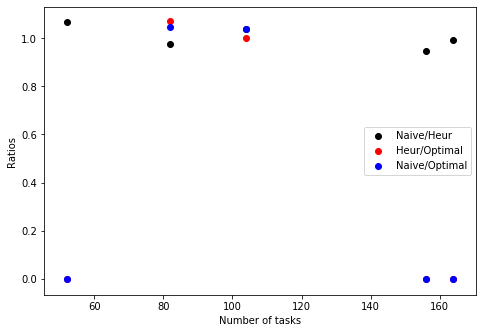

In [9]:
import matplotlib.pyplot as plt
import math

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])


#print(ub_ratio)
#plt.scatter(obj_lb_lst[:,0], obj_lb_lst[:,1], label='lower bound', color="g", linewidths=0.1)


# plt.scatter(x, y, s=5, label='opt/lb', color='b')
plt.scatter(x[:num], ratios1, label='Naive/Heur', color='k')
plt.scatter(x[:num], ratios2, label='Heur/Optimal', color='r')
plt.scatter(x[:num], ratios3, label='Naive/Optimal', color='b')
#plt.scatter(x, naives, label='Naives', color='g')
plt.xlabel('Number of tasks')
plt.ylabel('Ratios')
plt.legend()
plt.show()

In [10]:
import csv
with open("1000genome_naive_heur_3_machines.csv", 'w+') as f:
    writer = csv.writer(f)
    writer.writerow(["task_size", "optimal", "naive", "heuristic", "lowerbound", "upperbound"])
    writer.writerows(zip(x, y, naives, heurs, lbs, ubs))

NameError: name 'heurs' is not defined